# Jahan Model - translation

From Matlab Code to Python, this is a translation of the Jahan central carbon metabolism model.
This is a "light" version containing only the batch model for the WT.

Jahan et al. (2016): Development of an accurate kinetic model for the central carbon metabolism of Escherichia coli

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

## Define the fluxes (JahanModel_Flux.m)

In [58]:
def JahanModel_Flux(t,y): #, strain_no): #, continuous_flg):
    
    #global strain_no continuous_flg
    
    X      = y[0]
    GLCex  = y[1]
    GLC    = y[2]
    G6P    = y[3]
    F6P    = y[4]
    FBP    = y[5]
    GAP    = y[6]
    PEP    = y[7]
    PYR    = y[8]
    AcCoA  = y[9]
    AcP    = y[10]
    ACEex  = y[11]
    ICIT   = y[12]
    aKG    = y[13]
    SUC    = y[14]
    FUM    = y[15]
    MAL    = y[16]
    OAA    = y[17]
    GOX    = y[18]
    sixPGL = y[19]
    sixPG  = y[20]
    KDPG   = y[21]
    RU5P   = y[22]
    R5P    = y[23]
    X5P    = y[24]
    S7P    = y[25]
    E4P    = y[26]
    cAMP   = y[27]
    EIIAP  = y[28]
    Glk    = y[29]
    Pfk    = y[30]
    Fbp    = y[31]
    Fba    = y[32]
    Gapdh  = y[33]
    Pyk    = y[34]
    Pps    = y[35]
    Pdh    = y[36]
    Acs    = y[37]
    Cs     = y[38]
    Icdh   = y[39]
    IcdhP  = y[40]
    akgdh  = y[41]
    Sdh    = y[42]
    Fum    = y[43]
    Mdh    = y[44]
    Mez    = y[45]
    Pck    = y[46]
    Ppc    = y[47]
    Icl    = y[48]
    Ms     = y[49]
    AceK   = y[50]
    
    
    #********** MODEL PARAMETERS
    # constant component
    GLCfeed    = 2.22E+01
    ATP        = 9.60E+00
    ADP        = 5.60E-01
    AMP        = 2.80E-01
    NAD        = 2.60E+00
    NADH       = 8.30E-02
    NADP       = 2.10E-03
    NADPH      = 1.20E-01
    CoA        = 1.40E+00
    Pi         = 1.00E+01
    EIIAtotal  = 7.69E-02
    Crptotal   = 1.15E-02
    Cratotal   = 3.00E-04
    PdhRtotal  = 6.66E-05
    IclRtotal  = 8.30E-05
    pH         = 7.50E+00
    aceBAK_DNA = 5.15E-07
    
    # Kinetic parameter for PTS1 & PTS4
    kPts1       = 5.60E+04
    kmPts1      = 2.77E+04
    vPts4_max   = 3.94E+03
    KPts_EIIA   = 2.11E-03
    KPts_GLC    = 4.90E-03
    
    # Kinetic parameter for Non-PTS
    vNonpts_max  = 4.00E+03
    KNonpts_S    = 1.55E+00
    KNonpts_I    = 1.00E-02
    kGlk_cat     = 2.01E+06
    KGlk_GLC_m   = 1.54E-01
    KGlk_ATP_m   = 7.12E-01
    KGlk_G6P_i   = 1.50E+01
    
    # Kinetic parameter for Pgi
    vPgi_max         = 3.56E+06
    KPgi_eq          = 1.44E+00
    KPgi_G6P         = 2.46E+00
    KPgi_F6P         = 3.42E-01
    KPgi_F6P_6pginh  = 1.99E-01
    KPgi_G6P_6pginh  = 1.81E-01
    
    # Kinetic parameter for Pfk
    kPfk_cat   = 2.49E+10
    KPfk_PEP   = 1.74E+00
    KPfk_ADP_b = 2.56E-01
    KPfk_AMP_b = 2.55E-02
    KPfk_ADP_a = 2.77E+02
    KPfk_AMP_a = 1.01E+01
    KPfk_ATP_s = 1.61E-01
    KPfk_ADP_c = 4.48E-01
    KPfk_F6P_s = 2.11E-02
    LPfk       = 1.77E+06
    nPfk       = 4.00E+00
    
    # Kinetic parameter for Fbp
    kFbp_cat  = 7.86E+06
    KFbp_FBP  = 8.92E-03
    KFbp_PEP  = 4.88E-01
    LFbp      = 4.41E+06
    nFbp      = 4.00E+00
    
    # Kinetic parameter for Fba
    kFba_cat      = 6.95E+06
    KFba_eq       = 3.72E-01
    KFba_FBP      = 8.39E-02
    KFba_GAP      = 1.54E-01
    KFba_DHAP     = 8.80E-02
    VFba_blf      = 1.54E+00
    KFba_GAP_inh  = 6.00E-01
    
    # Kinetic parameter for Gapdh
    kGapdh_cat   = 5.05E+07
    KGapdh_eq    = 3.00E-01
    KGapdh_GAP   = 1.52E-01
    KGapdh_PGP   = 1.34E-01
    KGapdh_NAD   = 4.50E-01
    KGapdh_NADH  = 2.08E-02
    
    # Kinetic parameter for Pyk
    kPyk_cat  = 8.16E+04
    KPyk_PEP  = 3.10E-01
    KPyk_FBP  = 2.53E-01
    KPyk_AMP  = 2.55E-01
    KPyk_ADP  = 2.10E-01
    KPyk_ATP  = 2.02E+01
    LPyk      = 9.97E+02
    nPyk      = 4.00E+00
    
    # Kinetic parameter for Pps
    kPps_cat  = 2.49E+03
    KPps_PYR  = 7.13E-04
    KPps_PEP  = 2.16E-04
    LPps      = 1.04E-79
    nPps      = 2.00E+00
    
    # Kinetic parameter for Pdh
    kPdh_cat      = 4.83E+07 
    KPdh_i        = 6.83E+01 
    KPdh_PYR_m    = 1.00E+00 
    KPdh_NAD_m    = 4.01E-01 
    KPdh_NADH_m   = 4.71E-02 
    KPdh_CoA_m    = 4.82E-03 
    KPdh_AcCoA_m  = 8.00E-03 
    
    # Kinetic parameter for Pta
    vPta_max      = 5.36E+03
    KPta_eq       = 2.84E-02
    KPta_AcCoA_i  = 2.01E-01
    KPta_CoA_i    = 8.10E-02
    KPta_Pi_m     = 6.87E-01
    KPta_Pi_i     = 2.11E+00
    KPta_AcP_m    = 2.29E-01
    KPta_AcP_i    = 3.20E-01
    
    # Kinetic parameter for Ack
    vAck_max    = 1.95E+05
    KAck_eq     = 2.34E+02
    KAck_ADP_m  = 1.77E-01
    KAck_AcP_m  = 4.63E-02
    KAck_ACE_m  = 6.10E+00
    KAck_ATP_m  = 8.86E-02
    
    # Kinetic parameter for Acs
    kAcs_cat  = 1.29E+05
    KAcs_ACE  = 2.40E-02
    
    # Kinetic parameter for Cs
    kCs_cat        = 5.43E+05
    KCs_aKG        = 1.87E-01
    KCs_OAA_AcCoA  = 8.86E-03
    KCs_AcCoA      = 2.98E-02
    KCs_OAA        = 1.76E-02
    
    # Kinetic parameter for Icdh
    kIcdh_cat  = 8.58E+04
    KIcdh_ICIT = 2.01E-04
    KIcdh_PEP  = 5.48E-02
    LIcdh      = 9.26E+01
    nIcdh      = 2.00E+00
    
    # Kinetic parameter for alphakgdh
    kakgdh_cat     = 7.02E+08
    Kakgdh_NAD_m   = 5.52E-02
    Kakgdh_CoA_m   = 3.10E-03
    Kakgdh_aKG_m   = 2.37E-01
    Kakgdh_Z       = 4.17E+00
    Kakgdh_SUC_I   = 2.07E+00
    Kakgdh_NADH_I  = 1.79E-02
    Kakgdh_aKG_I   = 1.00E+00
    
    # Kinetic parameter for Sdh  
    kSdh1_cat   = 1.96E+04
    kSdh2_cat   = 1.96E+04
    KSdh_eq     = 2.97E+01
    KSdh_SUC_m  = 1.69E-01
    
    # Kinetic parameter for FUM 
    kFum1_cat   = 3.82E+05
    kFum2_cat   = 3.82E+05
    KFum_eq     = 1.29E+01
    KFum_FUM_m  = 9.65E-02
    
    # Kinetic parameter for Mdh 
    kMdh1_cat   = 4.60E+05
    kMdh2_cat   = 4.60E+05
    KMdh_eq     = 7.50E-01
    KMdh_NAD_m  = 5.22E-02
    KMdh_NAD_I  = 1.14E-01
    KMdh_NAD_II = 9.45E-01
    KMdh_MAL_m  = 1.77E+00
    KMdh_MAL_I  = 3.46E+00
    KMdh_OAA_m  = 2.08E-01
    KMdh_OAA_I  = 3.44E-01
    KMdh_OAA_II = 7.32E-02
    KMdh_NADH_m = 3.13E-02
    KMdh_NADH_I = 2.48E-02
    
    # Kinetic parameter for Mez
    kMez_cat   = 3.68E+05
    KMez_MAL   = 1.46E-03
    KMez_AcCoA = 1.82E+00
    KMez_cAMP  = 4.55E+00
    LMez       = 2.39E+05
    nMez       = 1.99E+00
    
    # Kinetic parameter for Pck
    kPck_cat    = 3.45E+06
    KPck_OAA    = 5.78E-01
    KPck_ATP_i  = 4.01E-02
    KPck_ADP_i  = 1.98E-02
    KPck_PEP    = 7.01E-02
    KPck_PEP_i  = 6.00E-02
    KPck_OAA_I  = 3.47E-01
    KPck_ATP_I  = 3.98E-02
    
    # Kinetic parameter for Ppc
    kPpc_cat  = 5.39E+06
    KPpc_PEP  = 2.72E-02
    KPpc_FBP  = 1.89E-01
    LPpc      = 5.65E+06
    nPpc      = 3.00E+00
    
    # Kinetic parameter for Icl
    kIcl_cat   = 9.42E+05
    KIcl_ICIT  = 1.51E-02
    KIcl_PEP   = 1.63E-02
    KIcl_3PG   = 5.22E-01
    KIcl_aKG   = 8.34E-01
    LIcl       = 1.91E+05
    nIcl       = 4.00E+00
    
    # Kinetic parameter for Ms
    kMs_cat        = 1.70E+04
    KMs_GOX_AcCoA  = 3.96E-01
    KMs_AcCoA      = 4.62E-01
    KMs_GOX        = 1.11E+00
    
    # Kinetic parameter for AceK-ki & AceK-ph
    kAceKki_cat = 5.27E+15
    kAceKph_cat = 1.82E+12
    KAceK_Icdh  = 1.97E-01
    KAceK_IcdhP = 7.26E+00
    KAceK_ICIT  = 8.70E-02
    KAceK_GOX   = 5.03E-01
    KAceK_OAA   = 7.23E-02
    KAceK_aKG   = 4.25E-01
    KAceK_PEP   = 3.61E-01
    KAceK_3PG   = 4.23E-01
    KAceK_PYR   = 3.45E-02
    LAceK       = 2.83E+08
    nAceK       = 2.00E+00
    
    # Kinetic parameter for G6Pdh
    vG6pdh_max            = 1.66E+04
    KG6pdh_G6P            = 7.12E-02
    KG6pdh_NADPH_g6pinh   = 1.93E-01
    KG6pdh_NADP           = 3.82E-03
    KG6pdh_NADPH_nadpinh  = 8.15E-02
    
    # Kinetic parameter for Pgl
    vPgl_max     = 2.28E+04
    KPgl_eq      = 4.27E+01
    KPgl_6PGL_m  = 2.30E-02
    KPgl_6PG_m   = 1.00E+01
    KPgl_h1      = 4.37E-03
    KPgl_h2      = 9.70E-06
    
    # Kinetic parameter for Edd
    vEdd_max    = 5.15E+02
    KEdd_eq     = 1.00E+03
    KEdd_6PG_m  = 1.18E-01
    KEdd_KDPG_m = 2.02E+00
    pH_Edd_m    = 7.53E+00
    pK_Edd      = 8.74E+00
    
    # Kinetic parameter for Eda
    vEda_max     = 6.67E+02
    KEda_eq      = 5.02E-01
    KEda_PYR_m   = 7.70E+00
    KEda_KDPG_m  = 1.50E-01
    KEda_GAP_m   = 1.18E+00
    pH_Eda_m     = 1.04E+01
    pK_Eda       = 3.70E+01
    
    # Kinetic parameter for 6PGDH
    v6Pgdh_max       = 2.48E+05
    K6Pgdh_6PG       = 1.01E-01
    K6Pgdh_NADP      = 2.08E-02
    K6Pgdh_NADPH_inh = 4.21E-02
    K6Pgdh_ATP_inh   = 3.01E+00
    
    # Kinetic parameter for R5PI
    vR5pi_max = 3.21E+04
    KR5pi_eq  = 4.77E-01
    
    # Kinetic parameter for Ru5P
    vRu5p_max = 1.27E+04
    KRu5p_eq  = 1.41E+00
    
    # Kinetic parameter for TktA
    vTktA_max = 8.87E+03
    KTktA_eq  = 1.20E+00
    
    # Kinetic parameter for TktB
    vTktB_max = 3.80E+05
    KTktB_eq  = 9.97E+00
    
    # Kinetic parameter for Tal
    vTal_max = 7.17E+04
    KTal_eq  = 1.05E+00
    
    # Kinetic parameter for Cya
    vCya_max   = 9.45E+00
    KCya_EIIAP = 2.08E-03
    
    # Kinetic parameter for cAMPdegr 
    vcAMPdegr_max  = 9.21E+00
    KcAMPdegr_cAMP = 4.83E-02
    
    # Kinetic parameter for Glk
    Kglk_Cra         = 1.22E-08
    vglk_Cra_unbound = 2.06E-01
    vglk_Cra_bound   = 1.56E-03
    
    # Kinetic parameter for pfkA
    KpfkA_Cra         = 9.87E-09
    vpfkA_Cra_unbound = 5.14E-02
    vpfkA_Cra_bound   = 1.43E-03
    
    # Kinetic parameter for fbp
    Kfbp_Cra         = 3.75E-05
    vfbp_Cra_unbound = 0.00E+00
    vfbp_Cra_bound   = 1.42E-03
    
    # Kinetic parameter for fbaA
    KfbaA_Cra         = 3.26E-03
    vfbaA_Cra_unbound = 2.52E-02
    vfbaA_Cra_bound   = 0.00E+00
    KfbaA_Crp         = 9.48E-03
    vfbaA_Crp_unbound = 0.00E+00
    vfbaA_Crp_bound   = 1.56E-02
    
    # Kinetic parameter for gapA
    KgapA_Cra         = 1.61E-02
    vgapA_Cra_unbound = 2.20E-02
    vgapA_Cra_bound   = 0.00E+00
    KgapA_Crp         = 4.75E-02
    vgapA_Crp_unbound = 0.00E+00
    vgapA_Crp_bound   = 3.00E-02
    
    # Kinetic parameter for pykF
    KpykF_Cra         = 7.26E-05
    vpykF_Cra_unbound = 1.13E-02
    vpykF_Cra_bound   = 4.30E-05
    
    # Kinetic parameter for ppsA
    KppsA_Cra          = 4.88E-04
    vppsA_Cra_unbound  = 0.00E+00
    vppsA_Cra_bound    = 5.32E-02
    
    # Kinetic parameter for pdh
    Kpdh_PdhR         = 2.46E-05
    vpdh_PdhR_unbound = 1.28E-03
    vpdh_PdhR_bound   = 7.50E-06
    
    # Kinetic parameter for acs
    Kacs_Crp         = 1.36E-03
    vacs_Crp_unbound = 0.00E+00
    vacs_Crp_bound   = 3.62E-04
    nacs             = 2.31E+00
    
    # Kinetic parameter for gltA
    KgltA_Crp         = 5.65E-02
    vgltA_Crp_unbound = 0.00E+00
    vgltA_Crp_bound   = 2.83E-02
    ngltA             = 1.07E+00
    
    # Kinetic parameter for icdA
    KicdA_Cra         = 2.92E-05
    vicdA_Cra_unbound = 7.07E-03
    vicdA_Cra_bound   = 1.96E-02
    
    # Kinetic parameter for sucAB
    KsucAB_Crp         = 3.09E-01
    vsucAB_Crp_unbound = 0.00E+00
    vsucAB_Crp_bound   = 2.39E-02
    nsucAB             = 7.40E-01
    
    # Kinetic parameter for sdhCDAB
    KsdhCDAB_Crp         = 8.56E-02
    vsdhCDAB_Crp_unbound = 0.00E+00
    vsdhCDAB_Crp_bound   = 2.44E-01
    nsdhCDAB             = 7.40E-01
    
    # Kinetic parameter for fumABC
    KfumABC_Crp         = 1.49E-01
    vfumABC_Crp_unbound = 0.00E+00
    vfumABC_Crp_bound   = 5.18E-02
    nfumABC             = 7.40E-01
    
    # Kinetic parameter for mdh
    Kmdh_Crp         = 2.14E-01
    vmdh_Crp_unbound = 0.00E+00
    vmdh_Crp_bound   = 1.01E-01
    
    # Kinetic parameter for maeB
    SS_Mez_GLC = 5.00E-03
    SS_Mez_ACE = 1.47E-02
    
    # Kinetic parameter for pckA 	 =	0.00E+00	;
    KpckA_Cra         = 1.52E-04
    vpckA_Cra_unbound = 0.00E+00
    vpckA_Cra_bound   = 1.37E-02
    
    # Kinetic parameter for ppc 
    SS_Ppc_GLC = 4.93E-03
    SS_Ppc_ACE = 1.47E-03
    
    # Kinetic parameter for aceA
    KaceBAK_Cra         = 5.40E-04
    vaceBAK_Cra_unbound = 1.76E-04
    vaceBAK_Cra_bound   = 5.10E-02
    KaceBAK_Crp         = 5.26E-01
    vaceBAK_Crp_unbound = 3.46E-03
    vaceBAK_Crp_bound   = 2.18E-05
    KaceBAK_DNA         = 9.51E-07
    KaceBAK_PYR         = 2.01E+00
    KaceBAK_PYRprime    = 2.72E-03
    KaceBAK_GOX         = 2.25E-03
    kaceBAK_cat_IclR    = 4.41E+00
    LaceBAK             = 4.12E+02
    
    # Kinetic parameter for aceB
    Factor_aceB = 3.09E-01
    
    # Kinetic parameter for aceK   	 =	0.00E+00	;
    Factor_aceK = 1.72E-02
    #			
    
    kexpr = 7.26E+00
    kdegr = 3.30E-01
    
    # Kinetic parameter for Biomass
    kBM_GLC_G6P    = 4.89E+01
    kBM_ACE_G6P    = 4.56E+02
    kBM_GLC_F6P    = 1.27E+03
    kBM_ACE_F6P    = 3.69E+02
    kBM_GLC_GAP    = 1.02E+02
    kBM_ACE_GAP    = 4.21E+02
    kBM_GLC_PEP    = 9.57E+02
    kBM_ACE_PEP    = 2.53E+02
    kBM_GLC_PYR    = 8.51E+02
    kBM_ACE_PYR    = 1.24E+04
    kBM_GLC_AcCoA  = 2.37E+03
    kBM_ACE_AcCoA  = 7.63E+02
    kBM_GLC_aKG    = 3.00E+03
    kBM_ACE_aKG    = 3.24E+02
    kBM_GLC_SUC    = 1.90E+03
    kBM_ACE_SUC    = 2.27E+02
    kBM_GLC_FUM    = 3.47E+03
    kBM_ACE_FUM    = 2.89E+02
    kBM_GLC_OAA    = 2.31E+04
    kBM_ACE_OAA    = 1.31E+04
    kBM_GLC_R5P    = 3.08E+02
    kBM_ACE_R5P    = 5.00E+02
    kBM_GLC_E4P    = 1.51E+03
    kBM_ACE_E4P    = 2.90E+02
    
    # Kinetic parameter for Crp-cAMP
    KCrpcAMP = 4.20E-01
    nCrpcAMP = 1.00E+00
    
    # Kinetic parameter for Cra-FBP
    KCraFBP = 2.94E-02
    nCraFBP = 2.00E+00
    
    # Kinetic parameter for PdhR-PYR
    KPdhRPYR = 4.34E-02
    nPdhRPYR = 1.00E+00
    
    #			
    POratio  = 3.48E+00
    POratio_prime = 1.49E+00
    kATP = 1.32E-05
    rho = 5.64E+02
    D = 0.00E+00
    
   # ##
   # # DeltaPyk
   # if strain_no is 2:
   #     vpykF_Cra_unbound = 0
   #     vpykF_Cra_bound   = 0
   # 
   # # DeltaPgi
   # if strain_no is 3:
   #     vPgi_max = 0
   #     
   # # DeltaPpc
   # if strain_no is 4:
   #     SS_Ppc_GLC = 0
   #     SS_Ppc_ACE = 0
   #     
   # # DeltaGlk
   # if strain_no is 5:
   #     vglk_Cra_unbound = 0
   #     vglk_Cra_bound   = 0
   #     
   # # DeltaPfk
   # if strain_no is 6:
   #     vpfkA_Cra_unbound = 0
   #     vpfkA_Cra_bound   = 0
   #     
   # # DeltaFbp
   # if strain_no is 7:
   #     vfbp_Cra_unbound = 0
   #     vfbp_Cra_bound   = 0
   #     
   # # DeltaFba
   # if strain_no is 8:
   #     vfbaA_Cra_unbound = 0
   #     vfbaA_Cra_bound   = 0
   #     vfbaA_Crp_unbound = 0
   #     vfbaA_Crp_bound   = 0
   #     
   # # DeltaGapdh
   # if strain_no is 9:
   #     vgapA_Cra_unbound = 0
   #     vgapA_Cra_bound   = 0
   #     vgapA_Crp_unbound = 0
   #     vgapA_Crp_bound   = 0
   #     
   # # DeltaPps
   # if strain_no is 10:
   #     vppsA_Cra_unbound = 0
   #     vppsA_Cra_bound   = 0
   #     
   # # DeltaG6Pdh
   # if strain_no is 11:
   #     vG6pdh_max = 0
   # 
   # # DeltaPgl
   # if strain_no is 12:
   #     vPgl_max = 0
   # 
   # # Delta6PGDH
   # if strain_no is 13:
   #     v6Pgdh_max = 0
   #     
   # # DeltaRu5P
   # if strain_no is 14:
   #     vRu5p_max = 0
   # 
   # # DeltaR5PI
   # if strain_no is 15:
   #     vR5pi_max = 0
   # 
   # # DeltaTktA
   # if strain_no is 16:
   #     vTktA_max = 0
   #     
   # # DeltaTktB
   # if strain_no is 17:
   #     vTktB_max = 0
   #     
   # # DeltaTal
   # if strain_no is 18:
   #     vTal_max = 0
   # 
   # ## Batch culture
   # if continuous_flg is 0:
    GLCfeed = 0
    D = 0
    
# ## Continuous culture
# if continuous_flg ~= 0
#     GLCfeed = 22.2;
# end
# if continuous_flg == 1
#     D = 0.2;
# end
# if continuous_flg == 2
#     D = 0.1;
# end
# if continuous_flg == 3
#     D = 0.4;
# end
# if continuous_flg == 4
#     D = 0.5;
# end
# if continuous_flg == 5
#     D = 0.7;
# end
# 
    ##
    #********** MODEL VARIABLES (v-independent)
    alphaGLC = GLCex/(GLCex+KPts_GLC)
    alphaACE = ACEex/(ACEex+KAcs_ACE)*(1-alphaGLC)
    H        = 10**(-pH)*1e+3
    EIIA     = EIIAtotal - EIIAP
    CrpcAMP  = Crptotal*(cAMP**nCrpcAMP)/((cAMP**nCrpcAMP)+(KCrpcAMP**nCrpcAMP))
    Crp      = Crptotal - CrpcAMP
    CraFBP   = Cratotal*(FBP**nCraFBP)/((FBP**nCraFBP)+(KCraFBP**nCraFBP))
    Cra      = Cratotal - CraFBP
    PdhRPYR  = PdhRtotal*(PYR**nPdhRPYR)/((PYR**nPdhRPYR)+(KPdhRPYR**nPdhRPYR))
    PdhR     = PdhRtotal - PdhRPYR
    
    #********** MODEL REACTIONS (mu-independent)
    vPts1          = kPts1*PEP*EIIA - kmPts1*PYR*EIIAP
    vPts4          = vPts4_max*EIIAP*GLCex/((KPts_EIIA+EIIAP)*(KPts_GLC+GLCex))
    vPts4_medium   = vPts4*X/rho
    vNonpts        = vNonpts_max*GLCex/(KNonpts_S+(1+EIIA/KNonpts_I)*GLCex)
    vNonpts_medium = vNonpts*X/rho
    vE_Glk         = Glk*kGlk_cat*(GLC/KGlk_GLC_m)*(ATP/(KGlk_ATP_m*(1+G6P/KGlk_G6P_i)))/(1+GLC/KGlk_GLC_m+ATP/(KGlk_ATP_m*(1+G6P/KGlk_G6P_i))+GLC*ATP/(KGlk_GLC_m*KGlk_ATP_m*(1+G6P/KGlk_G6P_i))+G6P/KGlk_G6P_i)
    vE_Pgi         = vPgi_max*(G6P-F6P/KPgi_eq)/(KPgi_G6P*(1+F6P/(KPgi_F6P*(1+sixPG/KPgi_F6P_6pginh))+sixPG/KPgi_G6P_6pginh)+G6P)
    A              = 1 + PEP/KPfk_PEP + ADP/KPfk_ADP_b + AMP/KPfk_AMP_b
    B              = 1 + ADP/KPfk_ADP_a + AMP/KPfk_AMP_a
    vE_Pfk         = Pfk*kPfk_cat*ATP*F6P/((ATP+KPfk_ATP_s*(1+ADP/KPfk_ADP_c))*(F6P+KPfk_F6P_s*A/B)*(1+LPfk/((1+F6P*B/(KPfk_F6P_s*A))**nPfk)))
    vE_Fbp         = Fbp*kFbp_cat*FBP/KFbp_FBP*((1+FBP/KFbp_FBP)**(nFbp-1))/(((1+FBP/KFbp_FBP)**nFbp)+LFbp/((1+PEP/KFbp_PEP)**nFbp))
    vE_Fba         = Fba*kFba_cat*(FBP-(GAP**2)/KFba_eq)/(KFba_FBP+FBP+KFba_GAP*GAP/(KFba_eq*VFba_blf)+KFba_DHAP*GAP/(KFba_eq*VFba_blf)+FBP*GAP/KFba_GAP_inh+(GAP**2)/(KFba_eq*VFba_blf))
    vE_Gapdh       = Gapdh*kGapdh_cat*(GAP*NAD-PEP*NADH/KGapdh_eq)/((KGapdh_GAP*(1+PEP/KGapdh_PGP)+GAP)*(KGapdh_NAD*(1+NADH/KGapdh_NADH)+NAD))
    vE_Pyk         = Pyk*kPyk_cat*PEP*((PEP/KPyk_PEP+1)**(nPyk-1))*ADP/(KPyk_PEP*(LPyk*(((1+ATP/KPyk_ATP)/(FBP/KPyk_FBP+AMP/KPyk_AMP+1))**nPyk)+((PEP/KPyk_PEP+1)**nPyk))*(ADP+KPyk_ADP))
    vE_Pps         = Pps*kPps_cat*PYR/KPps_PYR*((1+PYR/KPps_PYR)**(nPps-1))/(((1+PYR/KPps_PYR)**nPps)+LPps*((1+PEP/KPps_PEP)**nPps))
    vE_Pdh         = Pdh*kPdh_cat*(1/(1+KPdh_i*NADH/NAD))*(PYR/KPdh_PYR_m)*(NAD/KPdh_NAD_m)*(CoA/KPdh_CoA_m)/((1+PYR/KPdh_PYR_m)*(1+NAD/KPdh_NAD_m+NADH/KPdh_NADH_m)*(1+CoA/KPdh_CoA_m+AcCoA/KPdh_AcCoA_m))
    vE_Pta         = vPta_max*(1/(KPta_AcCoA_i*KPta_Pi_m))*(AcCoA*Pi-AcP*CoA/KPta_eq)/(1+AcCoA/KPta_AcCoA_i+Pi/KPta_Pi_i+AcP/KPta_AcP_i+CoA/KPta_CoA_i+AcCoA*Pi/(KPta_AcCoA_i*KPta_Pi_m)+AcP*CoA/(KPta_AcP_m*KPta_CoA_i))
    vE_Ack         = vAck_max*(1/(KAck_ADP_m*KAck_AcP_m))*(AcP*ADP-ACEex*ATP/KAck_eq)/((1+AcP/KAck_AcP_m+ACEex/KAck_ACE_m)*(1+ADP/KAck_ADP_m+ATP/KAck_ATP_m))
    vE_Ack_medium  = vE_Ack*X/rho
    vE_Acs         = Acs*kAcs_cat*ACEex/(ACEex+KAcs_ACE)
    vE_Acs_medium  = vE_Acs*X/rho
    vE_Cs          = Cs*kCs_cat*OAA*AcCoA/((1+aKG/KCs_aKG)*KCs_OAA_AcCoA*KCs_AcCoA+KCs_AcCoA*OAA+(1+aKG/KCs_aKG)*KCs_OAA*AcCoA+OAA*AcCoA)
    vE_Icdh        = Icdh*kIcdh_cat*ICIT/KIcdh_ICIT*((1+ICIT/KIcdh_ICIT)**(nIcdh-1))/(((1+ICIT/KIcdh_ICIT)**nIcdh)+LIcdh*((1+PEP/KIcdh_PEP)**nIcdh))
    vE_akgdh       = akgdh*kakgdh_cat*aKG*CoA*NAD/(Kakgdh_NAD_m*aKG*CoA+Kakgdh_CoA_m*aKG*NAD+Kakgdh_aKG_m*CoA*NAD+aKG*CoA*NAD+Kakgdh_aKG_m*Kakgdh_Z*SUC*NADH/Kakgdh_SUC_I+Kakgdh_NAD_m*aKG*CoA*NADH/Kakgdh_NADH_I+Kakgdh_CoA_m*aKG*NAD*SUC/Kakgdh_SUC_I+Kakgdh_aKG_m*Kakgdh_Z*aKG*SUC*NADH/(Kakgdh_aKG_I*Kakgdh_SUC_I))
    vSdh1_max      = Sdh*kSdh1_cat
    vSdh2_max      = Sdh*kSdh2_cat
    vE_Sdh         = vSdh1_max*vSdh2_max*(SUC-FUM/KSdh_eq)/(KSdh_SUC_m*vSdh2_max+vSdh2_max*SUC+vSdh1_max*FUM/KSdh_eq)
    vFum1_max      = Fum*kFum1_cat
    vFum2_max      = Fum*kFum2_cat
    vE_Fum         = vFum1_max*vFum2_max*(FUM-MAL/KFum_eq)/(KFum_FUM_m*vFum2_max+vFum2_max*FUM+vFum1_max*MAL/KFum_eq)
    vMdh1_max      = Mdh*kMdh1_cat
    vMdh2_max      = Mdh*kMdh2_cat
    vE_Mdh         = vMdh1_max*vMdh2_max*(NAD*MAL-NADH*OAA/KMdh_eq)/(KMdh_NAD_I*KMdh_MAL_m*vMdh2_max+KMdh_MAL_m*vMdh2_max*NAD+KMdh_NAD_m*vMdh2_max*MAL+ vMdh2_max*NAD*MAL+KMdh_OAA_m*vMdh1_max*NADH/KMdh_eq+KMdh_NADH_m*vMdh1_max*OAA/KMdh_eq+ vMdh1_max*NADH*OAA/KMdh_eq+vMdh1_max*KMdh_OAA_m*NAD*NADH/(KMdh_eq*KMdh_NAD_I)+vMdh2_max*KMdh_NAD_m*MAL*OAA/KMdh_OAA_I+ vMdh2_max*NAD*MAL*NADH/KMdh_NADH_I+vMdh1_max*MAL*NADH*OAA/(KMdh_eq*KMdh_MAL_I)+vMdh2_max*NAD*MAL*OAA/KMdh_OAA_II+ vMdh1_max*NAD*NADH*OAA/(KMdh_NAD_II*KMdh_eq)+KMdh_NAD_I*vMdh2_max*NAD*MAL*NADH*OAA/(KMdh_NAD_II*KMdh_OAA_m*KMdh_NADH_I))
    vE_Mez         = Mez*kMez_cat*MAL/KMez_MAL*((1+MAL/KMez_MAL)**(nMez-1))/(((1+MAL/KMez_MAL)**nMez)+LMez*((1+AcCoA/KMez_AcCoA+cAMP/KMez_cAMP)**nMez))
    vE_Pck         = Pck*kPck_cat*OAA*ATP/ADP/(KPck_OAA*ATP/ADP+OAA*ATP/ADP+KPck_ATP_i*KPck_OAA/KPck_ADP_i+KPck_ATP_i*KPck_OAA/(KPck_PEP*KPck_ADP_i)*PEP+KPck_ATP_i*KPck_OAA/(KPck_PEP_i*KPck_ATP_I)*ATP/ADP*PEP+KPck_ATP_i*KPck_OAA/(KPck_ADP_i*KPck_OAA_I)*OAA)
    vE_Ppc         = Ppc*kPpc_cat*PEP/KPpc_PEP*((1+PEP/KPpc_PEP)**(nPpc-1))/(((1+PEP/KPpc_PEP)**nPpc)+LPpc/((1+FBP/KPpc_FBP)**nPpc))
    vE_Icl         = Icl*kIcl_cat*ICIT/KIcl_ICIT*((1+ICIT/KIcl_ICIT)**(nIcl-1))/(((1+ICIT/KIcl_ICIT)**nIcl)+LIcl*((1+PEP/KIcl_PEP+GAP/KIcl_3PG+aKG/KIcl_aKG)**nIcl))
    vE_Ms          = Ms*kMs_cat*GOX*AcCoA/(KMs_GOX_AcCoA*KMs_AcCoA+KMs_AcCoA*GOX+KMs_GOX*AcCoA+GOX*AcCoA)
    vE_AceKki      = AceK*kAceKki_cat*Icdh/KAceK_Icdh*((1+Icdh/KAceK_Icdh)**(nAceK-1))/(((1+Icdh/KAceK_Icdh)**nAceK)+LAceK*((1+ICIT/KAceK_ICIT+GOX/KAceK_GOX+OAA/KAceK_OAA+aKG/KAceK_aKG+PEP/KAceK_PEP+GAP/KAceK_3PG+PYR/KAceK_PYR)**nAceK))
    vE_AceKph      = AceK*kAceKph_cat*IcdhP/KAceK_IcdhP*((1+IcdhP/KAceK_IcdhP)**(nAceK-1))/(((1+IcdhP/KAceK_IcdhP)**nAceK)+LAceK/((1+OAA/KAceK_OAA+aKG/KAceK_aKG+PEP/KAceK_PEP+GAP/KAceK_3PG+PYR/KAceK_PYR)**nAceK))
    vE_G6pdh       = vG6pdh_max*G6P*NADP/((G6P+KG6pdh_G6P)*(1+NADPH/KG6pdh_NADPH_g6pinh)*(KG6pdh_NADP*(1+NADPH/KG6pdh_NADPH_nadpinh)+NADP))
    vE_Pgl         = vPgl_max*(sixPGL-sixPG/KPgl_eq)/((1+H/KPgl_h1+KPgl_h2/H)*(KPgl_6PGL_m+sixPGL+KPgl_6PGL_m/KPgl_6PG_m*sixPG))
    QEdd_pH        = 1+2*(10**(pH_Edd_m-pK_Edd))/(1+(10**(pH-pK_Edd))+(10**(2*pH_Edd_m-pH-pK_Edd)))
    vE_Edd         = vEdd_max*QEdd_pH*(sixPG-KDPG/KEdd_eq)/(KEdd_6PG_m+sixPG+KEdd_6PG_m*KDPG/KEdd_KDPG_m)
    QEda_pH        = 1+2*(10**(pH_Eda_m-pK_Eda))/(1+(10**(pH-pK_Eda))+(10**(2*pH_Eda_m-pH-pK_Eda)))
    vE_Eda         = vEda_max*QEda_pH*(KDPG-GAP*PYR/KEda_eq)/(KEda_KDPG_m+KDPG+KEda_KDPG_m*(PYR/KEda_PYR_m+GAP/KEda_GAP_m+PYR*GAP/(KEda_PYR_m*KEda_GAP_m)))
    vE_6Pgdh       = v6Pgdh_max*sixPG*NADP/((sixPG+K6Pgdh_6PG)*(NADP+K6Pgdh_NADP*(1+NADPH/K6Pgdh_NADPH_inh)*(1+ATP/K6Pgdh_ATP_inh)))
    vE_R5pi        = vR5pi_max*(RU5P-R5P/KR5pi_eq)
    vE_Ru5p        = vRu5p_max*(RU5P-X5P/KRu5p_eq)
    vE_TktA        = vTktA_max*(R5P*X5P-S7P*GAP/KTktA_eq)
    vE_TktB        = vTktB_max*(X5P*E4P-F6P*GAP/KTktB_eq)
    vE_Tal         = vTal_max*(GAP*S7P-E4P*F6P/KTal_eq)
    vE_Cya         = vCya_max*EIIAP/(EIIAP+KCya_EIIAP)
    vE_cAMPdegr    = vcAMPdegr_max*cAMP/(cAMP+KcAMPdegr_cAMP)
    
    #********** MODEL VARIABLES (v-dependent)
    OP_NADH  = (vE_Gapdh+vE_Pdh+vE_akgdh+vE_Mdh)*POratio
    OP_FADH2 = vE_Sdh*POratio_prime
    vATP     = OP_NADH + OP_FADH2 - vE_Glk - vE_Pfk + vE_Gapdh + vE_Pyk - vE_Pps + vE_Ack - vE_Acs + vE_akgdh - vE_Pck - vE_AceKki - vE_Cya
    mu       = kATP*vATP
    
    #********** MODEL REACTIONS (mu-dependent)
    vgrowth    = mu*X
    vG_glk     = mu*kexpr*((1-Cra/(Cra+Kglk_Cra))*vglk_Cra_unbound+Cra/(Cra+Kglk_Cra)*vglk_Cra_bound)
    vG_pfkA    = mu*kexpr*((1-Cra/(Cra+KpfkA_Cra))*vpfkA_Cra_unbound+Cra/(Cra+KpfkA_Cra)*vpfkA_Cra_bound)
    vG_fbp     = mu*kexpr*((1-Cra/(Cra+Kfbp_Cra))*vfbp_Cra_unbound+Cra/(Cra+Kfbp_Cra)*vfbp_Cra_bound)
    vG_fbaA    = mu*kexpr*((1-Cra/(Cra+KfbaA_Cra))*vfbaA_Cra_unbound+Cra/(Cra+KfbaA_Cra)*vfbaA_Cra_bound+(1-CrpcAMP/(CrpcAMP+KfbaA_Crp))*vfbaA_Crp_unbound+CrpcAMP/(CrpcAMP+KfbaA_Crp)*vfbaA_Crp_bound)    
    vG_gapA    = mu*kexpr*((1-Cra/(Cra+KgapA_Cra))*vgapA_Cra_unbound+Cra/(Cra+KgapA_Cra)*vgapA_Cra_bound+(1-CrpcAMP/(CrpcAMP+KgapA_Crp))*vgapA_Crp_unbound+CrpcAMP/(CrpcAMP+KgapA_Crp)*vgapA_Crp_bound)
    vG_pykF    = mu*kexpr*((1-Cra/(Cra+KpykF_Cra))*vpykF_Cra_unbound+Cra/(Cra+KpykF_Cra)*vpykF_Cra_bound)
    vG_ppsA    = mu*kexpr*((1-Cra/(Cra+KppsA_Cra))*vppsA_Cra_unbound+Cra/(Cra+KppsA_Cra)*vppsA_Cra_bound)
    vG_pdh     = mu*kexpr*((1-PdhR/(PdhR+Kpdh_PdhR))*vpdh_PdhR_unbound+PdhR/(PdhR+Kpdh_PdhR)*vpdh_PdhR_bound)
    vG_acs     = mu*kexpr*((1-(CrpcAMP**nacs)/((CrpcAMP**nacs)+(Kacs_Crp**nacs)))*vacs_Crp_unbound+(CrpcAMP**nacs)/((CrpcAMP**nacs)+(Kacs_Crp**nacs))*vacs_Crp_bound)
    vG_gltA    = mu*kexpr*((1-(CrpcAMP**ngltA)/((CrpcAMP**ngltA)+(KgltA_Crp**ngltA)))*vgltA_Crp_unbound+(CrpcAMP**ngltA)/((CrpcAMP**ngltA)+(KgltA_Crp**ngltA))*vgltA_Crp_bound)
    vG_icdA    = mu*kexpr*((1-Cra/(Cra+KicdA_Cra))*vicdA_Cra_unbound+Cra/(Cra+KicdA_Cra)*vicdA_Cra_bound)
    vG_sucAB   = mu*kexpr*((1-(CrpcAMP**nsucAB)/((CrpcAMP**nsucAB)+(KsucAB_Crp**nsucAB)))*vsucAB_Crp_unbound+(CrpcAMP**nsucAB)/((CrpcAMP**nsucAB)+(KsucAB_Crp**nsucAB))*vsucAB_Crp_bound)
    vG_sdhCDAB = mu*kexpr*((1-(CrpcAMP**nsdhCDAB)/((CrpcAMP**nsdhCDAB)+(KsdhCDAB_Crp**nsdhCDAB)))*vsdhCDAB_Crp_unbound+(CrpcAMP**nsdhCDAB)/((CrpcAMP**nsdhCDAB)+(KsdhCDAB_Crp**nsdhCDAB))*vsdhCDAB_Crp_bound)
    vG_fumABC  = mu*kexpr*((1-(CrpcAMP**nfumABC)/((CrpcAMP**nfumABC)+(KfumABC_Crp**nfumABC)))*vfumABC_Crp_unbound+(CrpcAMP**nfumABC)/((CrpcAMP**nfumABC)+(KfumABC_Crp**nfumABC))*vfumABC_Crp_bound)
    vG_mdh     = mu*kexpr*((1-CrpcAMP/(CrpcAMP+Kmdh_Crp))*vmdh_Crp_unbound+CrpcAMP/(CrpcAMP+Kmdh_Crp)*vmdh_Crp_bound)
    SS_Mez     = alphaGLC*SS_Mez_GLC + alphaACE*SS_Mez_ACE
    vG_maeB    = (mu+kdegr)*SS_Mez
    vG_pckA    = mu*kexpr*((1-Cra/(Cra+KpckA_Cra))*vpckA_Cra_unbound+Cra/(Cra+KpckA_Cra)*vpckA_Cra_bound)
    SS_Ppc     = alphaGLC*SS_Ppc_GLC + alphaACE*SS_Ppc_ACE
    vG_ppc     = (mu+kdegr)*SS_Ppc
    vG_aceA    = mu*kexpr*(  (1-Cra/(Cra+KaceBAK_Cra))*vaceBAK_Cra_unbound + Cra/(Cra+KaceBAK_Cra)*vaceBAK_Cra_bound + (1-CrpcAMP/(CrpcAMP+KaceBAK_Crp))*vaceBAK_Crp_unbound + CrpcAMP/(CrpcAMP+KaceBAK_Crp)*vaceBAK_Crp_bound + ( 1-aceBAK_DNA/KaceBAK_DNA*(1+PYR/KaceBAK_PYRprime)/(1+1/LaceBAK*(GOX/KaceBAK_GOX)*(1+GOX/KaceBAK_GOX)+aceBAK_DNA/KaceBAK_DNA+PYR/KaceBAK_PYR+aceBAK_DNA/KaceBAK_DNA*PYR/KaceBAK_PYRprime)   )*kaceBAK_cat_IclR*IclRtotal  )
    vG_aceB    = Factor_aceB*vG_aceA
    vG_aceK    = Factor_aceK*vG_aceA
    vD_X       = D*X
    vD_GLCfeed = D*GLCfeed
    vD_GLCex   = D*GLCex
    vD_GLC     = mu*GLC
    vD_G6P     = mu*G6P
    vD_F6P     = mu*F6P
    vD_FBP     = mu*FBP
    vD_GAP     = mu*GAP
    vD_PEP     = mu*PEP
    vD_PYR     = mu*PYR
    vD_AcCoA   = mu*AcCoA
    vD_AcP     = mu*AcP
    vD_ACEex   = D*ACEex
    vD_ICIT    = mu*ICIT
    vD_aKG     = mu*aKG
    vD_SUC     = mu*SUC
    vD_FUM     = mu*FUM
    vD_MAL     = mu*MAL
    vD_OAA     = mu*OAA
    vD_GOX     = mu*GOX
    vD_6PGL    = mu*sixPGL
    vD_6PG     = mu*sixPG
    vD_KDPG    = mu*KDPG
    vD_RU5P    = mu*RU5P
    vD_R5P     = mu*R5P
    vD_X5P     = mu*X5P
    vD_S7P     = mu*S7P
    vD_E4P     = mu*E4P
    vD_cAMP    = mu*cAMP
    vD_Glk     = (mu+kdegr)*Glk
    vD_Pfk     = (mu+kdegr)*Pfk
    vD_Fbp     = (mu+kdegr)*Fbp
    vD_Fba     = (mu+kdegr)*Fba
    vD_Gapdh   = (mu+kdegr)*Gapdh
    vD_Pyk     = (mu+kdegr)*Pyk
    vD_Pps     = (mu+kdegr)*Pps
    vD_Pdh     = (mu+kdegr)*Pdh
    vD_Acs     = (mu+kdegr)*Acs
    vD_Cs      = (mu+kdegr)*Cs
    vD_Icdh    = (mu+kdegr)*Icdh
    vD_IcdhP   = (mu+kdegr)*IcdhP
    vD_akgdh   = (mu+kdegr)*akgdh
    vD_Sdh     = (mu+kdegr)*Sdh
    vD_Fum     = (mu+kdegr)*Fum
    vD_Mdh     = (mu+kdegr)*Mdh
    vD_Mez     = (mu+kdegr)*Mez
    vD_Pck     = (mu+kdegr)*Pck
    vD_Ppc     = (mu+kdegr)*Ppc
    vD_Icl     = (mu+kdegr)*Icl
    vD_Ms      = (mu+kdegr)*Ms
    vD_AceK    = (mu+kdegr)*AceK
    vBM_G6P    = (alphaGLC*kBM_GLC_G6P+alphaACE*kBM_ACE_G6P)*G6P
    vBM_F6P    = (alphaGLC*kBM_GLC_F6P+alphaACE*kBM_ACE_F6P)*F6P
    vBM_GAP    = (alphaGLC*kBM_GLC_GAP+alphaACE*kBM_ACE_GAP)*GAP
    vBM_PEP    = (alphaGLC*kBM_GLC_PEP+alphaACE*kBM_ACE_PEP)*PEP
    vBM_PYR    = (alphaGLC*kBM_GLC_PYR+alphaACE*kBM_ACE_PYR)*PYR
    vBM_AcCoA  = (alphaGLC*kBM_GLC_AcCoA+alphaACE*kBM_ACE_AcCoA)*AcCoA
    vBM_aKG    = (alphaGLC*kBM_GLC_aKG+alphaACE*kBM_ACE_aKG)*aKG
    vBM_SUC    = (alphaGLC*kBM_GLC_SUC+alphaACE*kBM_ACE_SUC)*SUC
    vBM_FUM    = (alphaGLC*kBM_GLC_FUM+alphaACE*kBM_ACE_FUM)*FUM
    vBM_OAA    = (alphaGLC*kBM_GLC_OAA+alphaACE*kBM_ACE_OAA)*OAA
    vBM_R5P    = (alphaGLC*kBM_GLC_R5P+alphaACE*kBM_ACE_R5P)*R5P
    vBM_E4P    = (alphaGLC*kBM_GLC_E4P+alphaACE*kBM_ACE_E4P)*E4P
    
    Flux = [ vgrowth, vPts1, vPts4, vPts4_medium, vNonpts,    #   5
        vNonpts_medium, vE_Glk, vE_Pgi, vE_Pfk, vE_Fbp,       #  10
        vE_Fba, vE_Gapdh, vE_Pyk, vE_Pps, vE_Pdh,             #  15
        vE_Pta, vE_Ack, vE_Ack_medium, vE_Acs, vE_Acs_medium, #  20
        vE_Cs, vE_Icdh, vE_akgdh, vE_Sdh, vE_Fum,             #  25
        vE_Mdh, vE_Mez, vE_Pck, vE_Ppc, vE_Icl,               #  30
        vE_Ms, vE_AceKki, vE_AceKph, vE_G6pdh, vE_Pgl,        #  35
        vE_Edd, vE_Eda, vE_6Pgdh, vE_R5pi, vE_Ru5p,           #  40
        vE_TktA, vE_TktB, vE_Tal, vE_Cya, vE_cAMPdegr,        #  45
        vG_glk, vG_pfkA, vG_fbp, vG_fbaA, vG_gapA,            #  50
        vG_pykF, vG_ppsA, vG_pdh, vG_acs, vG_gltA,            #  55
        vG_icdA, vG_sucAB, vG_sdhCDAB, vG_fumABC, vG_mdh,     #  60
        vG_maeB, vG_pckA, vG_ppc, vG_aceA, vG_aceB,           #  65
        vG_aceK, vD_X, vD_GLCfeed, vD_GLCex, vD_GLC,          #  70
        vD_G6P, vD_F6P, vD_FBP, vD_GAP, vD_PEP,               #  75
        vD_PYR, vD_AcCoA, vD_AcP, vD_ACEex, vD_ICIT,          #  80
        vD_aKG, vD_SUC, vD_FUM, vD_MAL, vD_OAA,               #  85
        vD_GOX, vD_6PGL, vD_6PG, vD_KDPG, vD_RU5P,            #  90
        vD_R5P, vD_X5P, vD_S7P, vD_E4P, vD_cAMP,              #  95
        vD_Glk, vD_Pfk, vD_Fbp, vD_Fba, vD_Gapdh,             # 100
        vD_Pyk, vD_Pps, vD_Pdh, vD_Acs, vD_Cs,                # 105
        vD_Icdh, vD_IcdhP, vD_akgdh, vD_Sdh, vD_Fum,          # 110
        vD_Mdh, vD_Mez, vD_Pck, vD_Ppc, vD_Icl,               # 115
        vD_Ms, vD_AceK, vBM_G6P, vBM_F6P, vBM_GAP,            # 120
        vBM_PEP, vBM_PYR, vBM_AcCoA, vBM_aKG, vBM_SUC,        # 125
        vBM_FUM, vBM_OAA, vBM_R5P, vBM_E4P, alphaGLC,         # 130
        alphaACE, H, EIIA, CrpcAMP, Crp,                      # 135
        CraFBP, Cra, PdhRPYR, PdhR, OP_NADH,                  # 140
        OP_FADH2, vATP, mu, A, B,                             # 145
        vSdh1_max, vSdh2_max, vFum1_max, vFum2_max, vMdh1_max,# 150
        vMdh2_max, QEdd_pH, QEda_pH, SS_Mez, SS_Ppc ]         # 155
    
    return Flux

## Define the ODEs (JahanModel_ODE.m)

In [64]:
def JahanModel_ODE(t, y): #, strain_no, continuous_flg):
    
    Flux = JahanModel_Flux(t, y) #, strain_no, continuous_flg)
    
    vgrowth        = Flux[0]
    vPts1          = Flux[1]
    vPts4          = Flux[2]
    vPts4_medium   = Flux[3]
    vNonpts        = Flux[4]
    vNonpts_medium = Flux[5]
    vE_Glk         = Flux[6]
    vE_Pgi         = Flux[7]
    vE_Pfk         = Flux[8]
    vE_Fbp         = Flux[9]
    vE_Fba         = Flux[10]
    vE_Gapdh       = Flux[11]
    vE_Pyk         = Flux[12]
    vE_Pps         = Flux[13]
    vE_Pdh         = Flux[14]
    vE_Pta         = Flux[15]
    vE_Ack         = Flux[16]
    vE_Ack_medium  = Flux[17]
    vE_Acs         = Flux[18]
    vE_Acs_medium  = Flux[19]
    vE_Cs          = Flux[20]
    vE_Icdh        = Flux[21]
    vE_akgdh       = Flux[22]
    vE_Sdh         = Flux[23]
    vE_Fum         = Flux[24]
    vE_Mdh         = Flux[25]
    vE_Mez         = Flux[26]
    vE_Pck         = Flux[27]
    vE_Ppc         = Flux[28]
    vE_Icl         = Flux[29]
    vE_Ms          = Flux[30]
    vE_AceKki      = Flux[31]
    vE_AceKph      = Flux[32]
    vE_G6pdh       = Flux[33]
    vE_Pgl         = Flux[34]
    vE_Edd         = Flux[35]
    vE_Eda         = Flux[36]
    vE_6Pgdh       = Flux[37]
    vE_R5pi        = Flux[38]
    vE_Ru5p        = Flux[39]
    vE_TktA        = Flux[40]
    vE_TktB        = Flux[41]
    vE_Tal         = Flux[42]
    vE_Cya         = Flux[43]
    vE_cAMPdegr    = Flux[44]
    vG_glk         = Flux[45]
    vG_pfkA        = Flux[46]
    vG_fbp         = Flux[47]
    vG_fbaA        = Flux[48]
    vG_gapA        = Flux[49]
    vG_pykF        = Flux[50]
    vG_ppsA        = Flux[51]
    vG_pdh         = Flux[52]
    vG_acs         = Flux[53]
    vG_gltA        = Flux[54]
    vG_icdA        = Flux[55]
    vG_sucAB       = Flux[56]
    vG_sdhCDAB     = Flux[57]
    vG_fumABC      = Flux[58]
    vG_mdh         = Flux[59]
    vG_maeB        = Flux[60]
    vG_pckA        = Flux[61]
    vG_ppc         = Flux[62]
    vG_aceA        = Flux[63]
    vG_aceB        = Flux[64]
    vG_aceK        = Flux[65]
    vD_X           = Flux[66]
    vD_GLCfeed     = Flux[67]
    vD_GLCex       = Flux[68]
    vD_GLC         = Flux[69]
    vD_G6P         = Flux[70]
    vD_F6P         = Flux[71]
    vD_FBP         = Flux[72]
    vD_GAP         = Flux[73]
    vD_PEP         = Flux[74]
    vD_PYR         = Flux[75]
    vD_AcCoA       = Flux[76]
    vD_AcP         = Flux[77]
    vD_ACEex       = Flux[78]
    vD_ICIT        = Flux[79]
    vD_aKG         = Flux[80]
    vD_SUC         = Flux[81]
    vD_FUM         = Flux[82]
    vD_MAL         = Flux[83]
    vD_OAA         = Flux[84]
    vD_GOX         = Flux[85]
    vD_6PGL        = Flux[86]
    vD_6PG         = Flux[87]
    vD_KDPG        = Flux[88]
    vD_RU5P        = Flux[89]
    vD_R5P         = Flux[90]
    vD_X5P         = Flux[91]
    vD_S7P         = Flux[92]
    vD_E4P         = Flux[93]
    vD_cAMP        = Flux[94]
    vD_Glk         = Flux[95]
    vD_Pfk         = Flux[96]
    vD_Fbp         = Flux[97]
    vD_Fba         = Flux[98]
    vD_Gapdh       = Flux[99]
    vD_Pyk         = Flux[100]
    vD_Pps         = Flux[101]
    vD_Pdh         = Flux[102]
    vD_Acs         = Flux[103]
    vD_Cs          = Flux[104]
    vD_Icdh        = Flux[105]
    vD_IcdhP       = Flux[106]
    vD_akgdh       = Flux[107]
    vD_Sdh         = Flux[108]
    vD_Fum         = Flux[109]
    vD_Mdh         = Flux[110]
    vD_Mez         = Flux[111]
    vD_Pck         = Flux[112]
    vD_Ppc         = Flux[113]
    vD_Icl         = Flux[114]
    vD_Ms          = Flux[115]
    vD_AceK        = Flux[116]
    vBM_G6P        = Flux[117]
    vBM_F6P        = Flux[118]
    vBM_GAP        = Flux[119]
    vBM_PEP        = Flux[120]
    vBM_PYR        = Flux[121]
    vBM_AcCoA      = Flux[122]
    vBM_aKG        = Flux[123]
    vBM_SUC        = Flux[124]
    vBM_FUM        = Flux[125]
    vBM_OAA        = Flux[126]
    vBM_R5P        = Flux[127]
    vBM_E4P        = Flux[128]
    
    #********** MODEL STATES
    X_dot      = vgrowth - vD_X
    GLCex_dot  = vD_GLCfeed - vD_GLCex - vPts4_medium - vNonpts_medium
    GLC_dot    = vNonpts - vE_Glk - vD_GLC
    G6P_dot    = vPts4 + vE_Glk - vE_Pgi - vE_G6pdh - vD_G6P - vBM_G6P
    F6P_dot    = vE_Pgi + vE_TktB + vE_Tal + vE_Fbp - vE_Pfk - vD_F6P - vBM_F6P
    FBP_dot    = vE_Pfk - vE_Fba - vE_Fbp - vD_FBP
    GAP_dot    = 2*vE_Fba + vE_TktA + vE_TktB + vE_Eda - vE_Tal - vE_Gapdh - vD_GAP - vBM_GAP
    PEP_dot    = vE_Gapdh + vE_Pck + vE_Pps - vE_Pyk - vPts1 - vE_Ppc - vD_PEP - vBM_PEP
    PYR_dot    = vE_Pyk + vPts1 + vE_Mez + vE_Eda - vE_Pdh - vE_Pps - vD_PYR - vBM_PYR
    AcCoA_dot  = vE_Pdh + vE_Acs - vE_Cs - vE_Ms - vE_Pta - vD_AcCoA - vBM_AcCoA
    AcP_dot    = vE_Pta - vE_Ack - vD_AcP
    ACEex_dot  = vE_Ack_medium - vE_Acs_medium - vD_ACEex
    ICIT_dot   = vE_Cs - vE_Icdh - vE_Icl - vD_ICIT
    aKG_dot    = vE_Icdh - vE_akgdh - vD_aKG - vBM_aKG
    SUC_dot    = vE_akgdh + vE_Icl - vE_Sdh - vD_SUC - vBM_SUC
    FUM_dot    = vE_Sdh - vE_Fum - vD_FUM - vBM_FUM
    MAL_dot    = vE_Fum + vE_Ms - vE_Mdh - vE_Mez - vD_MAL
    OAA_dot    = vE_Mdh + vE_Ppc - vE_Pck - vE_Cs - vD_OAA - vBM_OAA
    GOX_dot    = vE_Icl - vE_Ms - vD_GOX
    sixPGL_dot = vE_G6pdh - vE_Pgl - vD_6PGL
    sixPG_dot  = vE_Pgl - vE_6Pgdh - vE_Edd - vD_6PG
    KDPG_dot   = vE_Edd - vE_Eda - vD_KDPG
    RU5P_dot   = vE_6Pgdh - vE_Ru5p - vE_R5pi - vD_RU5P
    R5P_dot    = vE_R5pi - vE_TktA - vD_R5P - vBM_R5P
    X5P_dot    = vE_Ru5p - vE_TktA - vE_TktB - vD_X5P
    S7P_dot    = vE_TktA - vE_Tal - vD_S7P
    E4P_dot    = vE_Tal - vE_TktB - vD_E4P - vBM_E4P
    cAMP_dot   = vE_Cya - vE_cAMPdegr - vD_cAMP
    EIIAP_dot  = vPts1 - vPts4
    Glk_dot    = vG_glk - vD_Glk
    Pfk_dot    = vG_pfkA - vD_Pfk
    Fbp_dot    = vG_fbp - vD_Fbp
    Fba_dot    = vG_fbaA - vD_Fba
    GAPDH_dot  = vG_gapA - vD_Gapdh
    Pyk_dot    = vG_pykF - vD_Pyk
    Pps_dot    = vG_ppsA - vD_Pps
    PDH_dot    = vG_pdh - vD_Pdh
    Acs_dot    = vG_acs - vD_Acs
    CS_dot     = vG_gltA - vD_Cs
    ICDH_dot   = vG_icdA + vE_AceKph - vE_AceKki - vD_Icdh
    ICDHP_dot  = vE_AceKki - vE_AceKph - vD_IcdhP
    aKGDH_dot  = vG_sucAB - vD_akgdh
    SDH_dot    = vG_sdhCDAB - vD_Sdh
    Fum_dot    = vG_fumABC - vD_Fum
    MDH_dot    = vG_mdh - vD_Mdh
    Mez_dot    = vG_maeB - vD_Mez
    Pck_dot    = vG_pckA - vD_Pck
    Ppc_dot    = vG_ppc - vD_Ppc
    Icl_dot    = vG_aceA - vD_Icl
    MS_dot     = vG_aceB - vD_Ms
    AceK_dot   = vG_aceK - vD_AceK
    
    if t < 0:
        X_dot     = 0
        GLCex_dot = 0
        ACEex_dot = 0
    
    dydt = [ X_dot, GLCex_dot, GLC_dot, G6P_dot, F6P_dot, #  5
        FBP_dot, GAP_dot, PEP_dot, PYR_dot, AcCoA_dot,    # 10
        AcP_dot, ACEex_dot, ICIT_dot, aKG_dot, SUC_dot,   # 15
        FUM_dot, MAL_dot, OAA_dot, GOX_dot, sixPGL_dot,   # 20
        sixPG_dot, KDPG_dot, RU5P_dot, R5P_dot, X5P_dot,  # 25
        S7P_dot, E4P_dot, cAMP_dot, EIIAP_dot, Glk_dot,   # 30
        Pfk_dot, Fbp_dot, Fba_dot, GAPDH_dot, Pyk_dot,    # 35
        Pps_dot, PDH_dot, Acs_dot, CS_dot, ICDH_dot,      # 40
        ICDHP_dot, aKGDH_dot, SDH_dot, Fum_dot, MDH_dot,  # 45
        Mez_dot, Pck_dot, Ppc_dot, Icl_dot, MS_dot,       # 50
        AceK_dot ]                                        # 51
    
    return dydt
    

## Get initial conditions for simulation (getInitialCondition.m)

In [65]:
def getInitialCondition():
    
    y0 = np.zeros(51)
    y0[0] = 1.200e-02     # X
    y0[1] = 2.250e+01     # GLCex
    y0[2] = 2.845e+00     # GLC
    y0[3] = 3.479e+00     # G6P
    y0[4] = 5.684e-01     # F6P
    y0[5] = 1.503e+01     # FBP
    y0[6] = 2.182e-01     # GAP
    y0[7] = 4.028e-01     # PEP
    y0[8] = 1.765e+00     # PYR
    y0[9] = 6.117e-01   # AcCoA
    y0[10] = 1.103e+00   # AcP
    y0[11] = 0.000e+00   # ACEex
    y0[12] = 1.099e-01   # ICIT
    y0[13] = 4.418e-01   # aKG
    y0[14] = 5.734e-01   # SUC
    y0[15] = 1.199e-01   # FUM
    y0[16] = 1.432e+00   # MAL
    y0[17] = 6.507e-01   # OAA
    y0[18] = 8.051e-02   # GOX
    y0[19] = 1.607e+00   # sixPGL
    y0[20] = 3.457e+00   # sixPG
    y0[21] = 1.041e+00   # KDPG
    y0[22] = 1.586e-01   # RU5P
    y0[23] = 3.979e-01   # R5P
    y0[24] = 1.878e-01   # X5P
    y0[25] = 6.627e-02   # S7P
    y0[26] = 9.702e-02   # E4P
    y0[27] = 1.963e-02   # cAMP
    y0[28] = 1.445e-02   # EIIAP
    y0[29] = 3.066e-03   # Glk
    y0[30] = 1.432e-03   # Pfk
    y0[31] = 2.966e-04   # Fbp
    y0[32] = 2.342e-02   # Fba
    y0[33] = 4.028e-02   # Gapdh
    y0[34] = 2.879e-03   # Pyk
    y0[35] = 3.863e-03   # Pps
    y0[36] = 5.300e-04   # Pdh
    y0[37] = 1.689e-04   # Acs
    y0[38] = 2.777e-03   # Cs
    y0[39] = 1.721e-01   # Icdh
    y0[40] = 1.195e-01   # IcdhP
    y0[41] = 2.612e-03   # akgdh
    y0[42] = 5.954e-02   # Sdh
    y0[43] = 2.105e-03   # Fum
    y0[44] = 7.350e-03   # Mdh
    y0[45] = 1.869e-04   # Mez
    y0[46] = 6.727e-04   # Pck
    y0[47] = 3.417e-06   # Ppc
    y0[48] = 1.204e-02   # Icl
    y0[49] = 3.618e-03   # Ms
    y0[50] = 2.865e-05   # AceK
    
    return y0
    
    


## ODE Solver (based on runSimulation.m)

Solved with the corresponding mechanisms in Python, though not explicitly translated

In [ ]:
## Wild Type
#strain_no = 1 # strain number 1 - wild type
#continuous_flg = 0

#time
t_start = -10
t_end = 12
t_step = 0.00001

# Number of time steps: 1 extra for initial condition
num_steps = np.floor((t_end - t_start)/t_step) + 1

y0 = getInitialCondition()
#y0[0] = 0.011        # X
#y0[1] = 4.0/180*1e+3 # GLCex
#y0[11] = 0.0/ 60*1e+3 # ACEex
n = len(y0)


# Additional Python step: create vectors to store trajectories
t = np.zeros((int(num_steps), 1))
C = np.zeros((int(num_steps), n))
t[0] = t_start
C[0,:] = y0

#integration

r = integrate.ode(JahanModel_ODE).set_integrator('vode', method='bdf', order=15) #, rtol = 1e-6)
r.set_initial_value(y0, t_start) #.set_f_params(strain_no, continuous_flg)

# Integrate the ODE(s) across each delta_t timestep
k = 1
while r.successful() and k < num_steps:
    r.integrate(r.t + t_step)

    # Store the results to plot later
    t[k] = r.t
    C[k,:] = r.y #[0]
    k += 1


#function [ T, Y, FLUX ] = runSimulation(ode_file,flux_file,span,y0,options)
#
#[T, Y] = ode15s(ode_file,span,y0,options);
#tmp    = flux_file(T(1),Y(1,:));
#n_FLUX = length(tmp);
#n_time = length(T);
#FLUX   = zeros(n_time,n_FLUX);
#
#for i = 1:n_time
#    FLUX(i,:) = flux_file(T(i),Y(i,:));
#end
#
#JahanModel_ODE(t, y, strain_no, continuous_flg)
#
#global strain_no continuous_flg;
#[Yidx, Fidx] = setIndex();
#
#
#options = odeset('RelTol',1e-10,'AbsTol',1e-10);
#n_FLUX = 155;
#ode_file = @JahanModel_ODE;
#flux_file = @JahanModel_Flux;
#
#%% Wild Type
#strain_no = 1;
#continuous_flg = 0;
#span = -10:0.1:12;
#y0 = getInitialCondition();
#y0( 1) = 0.011;        % X
#y0( 2) = 4.0/180*1e+3; % GLCex
#y0(12) = 0.0/ 60*1e+3; % ACEex
#[ T1, Y1, FLUX1 ] = runSimulation(ode_file,flux_file,span,y0,options);
#Y1 = real(Y1); FLUX1 = real(FLUX1);
#plotSimulationResult(T1,Y1,FLUX1,strain_no,[0 max(span)],[0 5]);
#
#
#
#%% Metabolite comparison with Toya 2010
#scrsz = get(0,'ScreenSize');
#h = figure('Position',[10 scrsz(4)*0.24*0.5 scrsz(3)*0.24*3 scrsz(4)*0.24*3]);
t

# Plot the results

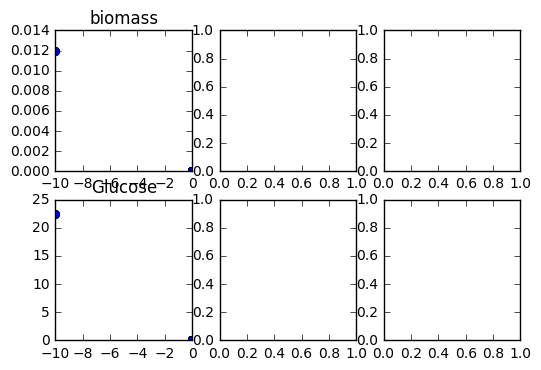

In [63]:
f, axarr = plt.subplots(2,3)
axarr[0,0].plot(t, C[:,0], 'o')
axarr[0,0].set_title('biomass')
# Make the y-axis label and tick labels match the line color.
#axarr[0].set_ylabel('glucose, biomass [a.u]', color='b')
#for tl in axarr[0].get_yticklabels():
#    tl.set_color('b')
    
#ax2 = axarr[0,0].twinx()
#ax2.plot(t, C[:,3], 'r')
##ax2.set_ylabel('exported product [a.u.]', color='r')
#for tl in ax2.get_yticklabels():
#    tl.set_color('r')

axarr[1,0].plot(t,C[:,1], 'o') #, t, C[:,2], 'o')
axarr[1,0].set_title('Glucose')
#f.savefig('test.png')

## row and column sharing
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#ax1.plot(x, y)
#ax1.set_title('Sharing x per column, y per row')
#ax2.scatter(x, y)
#ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#ax4.plot(x, 2 * y ** 2 - 1, color='r')
#
